In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
start = time.perf_counter()

# Parametry fizyczne
hbar = 1.0
m = 0.5

# Siatka przestrzenna
N = 2**12
x_max = 7.0
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]

# Operator Laplace’a (druga pochodna)
diag = -2.0 * np.ones(N)
off_diag = 1.0 * np.ones(N - 1)
T = (np.diag(diag) + np.diag(off_diag, +1) + np.diag(off_diag, -1)) / dx**2

# Potencjał oscylatora harmonicznego# Potencjał: V(x, y)
k0 = -132.7074997
k2 = 7
k3 = 0.5
k4 = 1
# Warunki na przedział
x_1 = -4.112
x_2 = 3.813

# Inicjalizacja potencjału jako tablica zer
V = np.zeros_like(x)

# Obliczam V tylko tam, gdzie x mieści się w zadanym przedziale
mask = (x > x_1) & (x < x_2)
V[mask] = k0 - k2 * x[mask]**2 + k3 * x[mask]**3 + k4 * x[mask]**4
V_matrix = np.diag(V)

# Hamiltonian
H = -(hbar**2 / (2 * m)) * T + V_matrix

# Rozwiązanie zagadnienia własnego
energies, wavefuncs = np.linalg.eigh(H)

energies = energies + 132.707502

end = time.perf_counter()
print(f"Czas działania: {end - start:.6f} sekundy")

Czas działania: 10.303595 sekundy


Najniższe energie własne:
E_0 = -12.258807
E_1 = -6.045693
E_2 = -5.286896
E_3 = -0.646947
E_4 = 0.690323
E_5 = 4.052256
E_6 = 7.367501
E_7 = 11.233629
E_8 = 15.429458
E_9 = 19.935627
E_10 = 24.718122
E_11 = 29.753886
E_12 = 35.024049
E_13 = 40.513021
E_14 = 46.207588
E_15 = 52.096353
E_16 = 58.169326
E_17 = 64.417608
E_18 = 70.833086
E_19 = 77.408096
E_20 = 84.134927
E_21 = 91.005007
E_22 = 98.007397
E_23 = 105.125807
E_24 = 112.332021
E_25 = 119.568556
E_26 = 126.684385
E_27 = 132.776493
E_28 = 133.649480
E_29 = 134.187136
E_30 = 136.189755
E_31 = 137.239817
E_32 = 139.650235
E_33 = 141.540130
E_34 = 143.689613
E_35 = 146.546767
E_36 = 149.131849
E_37 = 152.016706
E_38 = 155.150285
E_39 = 158.415187
E_40 = 161.807575
E_41 = 165.291309
E_42 = 169.072574
E_43 = 172.962305
E_44 = 176.798635
E_45 = 180.948173
E_46 = 185.338744
E_47 = 189.582514
E_48 = 193.999495
E_49 = 198.790550
E_50 = 203.538623
E_51 = 208.242657
E_52 = 213.277684
E_53 = 218.509995
E_54 = 223.639731
E_55 = 228.875117
E

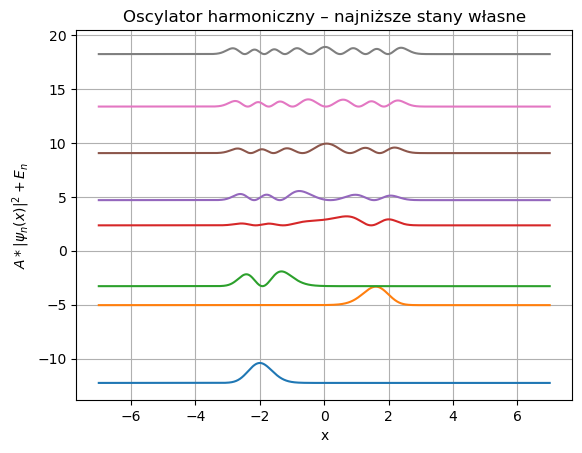

In [9]:
# Wypisz kilka najniższych energii
print("Najniższe energie własne:")
for i in range(65):
    print(f"E_{i} = {energies[i]:.6f}")

# Normalizuj i narysuj funkcje falowe
for i in range(0, 8):
    psi = wavefuncs[:, i]
    psi /= np.linalg.norm(psi)  # normalizacja
    plt.plot(x, 500*np.abs(psi)**2 + energies[i] + i)       # ψ_n przesunięta w pionie
plt.title("Oscylator harmoniczny – najniższe stany własne")
plt.xlabel("x")
plt.ylabel("$A*|ψ_n(x)|^2 + E_n$")
plt.grid()
plt.show()


In [12]:
np.save("funkcje psi(E) dla asymetrycznej studni 1D FD.npy", wavefuncs[:, 0:27])

In [13]:
np.save("energie własne E dla asymetrycznej studni 1D FD.npy", energies[0:27])